In [ ]:
from core.training import train_tise_example
import matplotlib.pyplot as plt
import torch
from schrodinger_box.time_independent_1d import ansatzfactor_HO_asym,ansatzfactor_HO_sym,PotentialHarmonicOscillator,ansatzfactor_1Dbox, ansatzfactor_nothing
import numpy

L = 1.0


In [ ]:
n = 2
E = (torch.pi**2*n**2)/(2*(2*L)**2)

def analytic_psi(x,n,L): 
    if n % 2 == 1:    
        return numpy.sqrt(1/L)*numpy.cos(((n*numpy.pi)/(2*L))*x)
    else: 
        return numpy.sqrt(1/L)*numpy.sin(((n*numpy.pi)/(2*L))*x)

torch.manual_seed(124)

ansatz_factor = ansatzfactor_nothing

pinn,loss_vals,d2psidx2 = train_tise_example(
    L = L, 
    n_epochs = 2000,
    N_samples = 2048,
    width = 20,
    hidden_layers = 4,
    lr = 1e-3,
    E = E, 
    ansatz_factor = ansatz_factor,
        #potential = PotentialHarmonicOscillator(),
    batch_size = 256
)


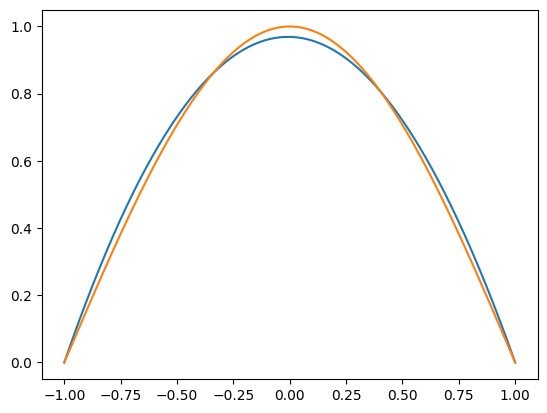

torch.Size([501, 1])
torch.Size([501, 1])
tensor(0.2161)


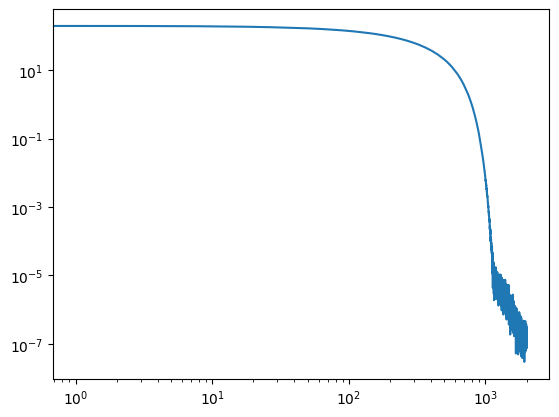

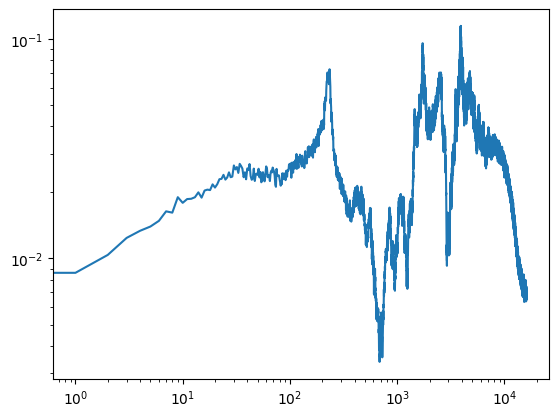

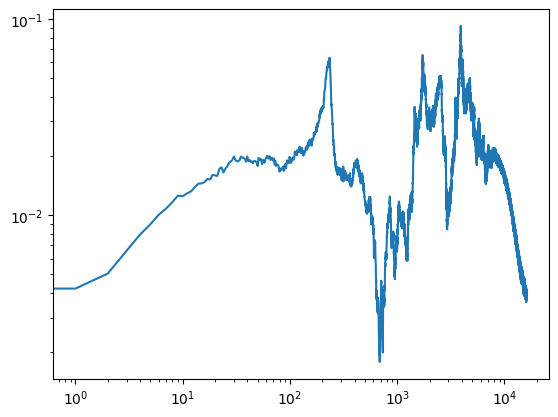

In [4]:
x_test = torch.linspace(-L,L,501).view(-1,1)

NN_psi = pinn(x_test).detach()

norm = torch.trapz(NN_psi[:,0]**2,x_test[:,0])

plt.plot(x_test,-NN_psi/torch.sqrt(norm))
plt.plot(x_test,(analytic_psi(x_test.detach().numpy(),n=1,L=L)))
plt.show()

print(pinn(x_test).detach().shape)
print(x_test.shape)

print(torch.trapz(pinn(x_test).detach()[:,0]**2,x_test[:,0]))

plt.loglog((range(len(loss_vals))),loss_vals)
plt.show()

plt.loglog(range(torch.stack(d2psidx2).abs().mean(dim=1).shape[0]),torch.stack(d2psidx2).abs().mean(dim=1))
plt.show()

plt.loglog(range(torch.stack(d2psidx2).abs().std(dim=1).shape[0]),torch.stack(d2psidx2).abs().std(dim=1))
plt.show()